In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [98]:
class LinearRegression:
    def __init__(self, lr = 0.0035, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
    def fit(self,X,y):
        n_samples,n_features = X.shape
        self.weights = np.zeros(n_features, dtype=float)
        self.bias = 0.0
        for i in range(self.n_iters):
            y_pred = np.dot(X,self.weights) + self.bias 
            dw = 2/n_samples * np.dot(X.T,(y_pred - y))
            db = 2/n_samples * np.sum(y_pred - y)
            self.weights = self.weights - self.lr*dw
            self.bias = self.bias - self.lr*db
    def predict(self,X):
            y_pred = np.dot(X,self.weights) + self.bias
            return y_pred
            

In [99]:
cd Developer/

[Errno 2] No such file or directory: 'Developer/'
/Users/sharathchenna/Developer


In [100]:
data = pd.read_csv("Fuel.csv")
train_test = data[["FUELCONSUMPTION_CITY", "FUELCONSUMPTION_HWY"]]
X_train = train_test.iloc[:700]
X_test = train_test.iloc[300:]
predict_test = data["CO2EMISSIONS"]
Y_train = predict_test.iloc[:700]
Y_test = predict_test.iloc[300:]


In [101]:
regression = LinearRegression()
regression.fit(X_train,Y_train)
y_pred1 = regression.predict(X_test)


In [102]:
y_true = Y_test
y_pred = y_pred1
squared_errors = [(true - pred) ** 2 for true, pred in zip(y_true, y_pred)]
mse = np.mean(squared_errors)
rmse = np.sqrt(mse)
print("RMSE:", rmse)



RMSE: 4.350015977793786e+103


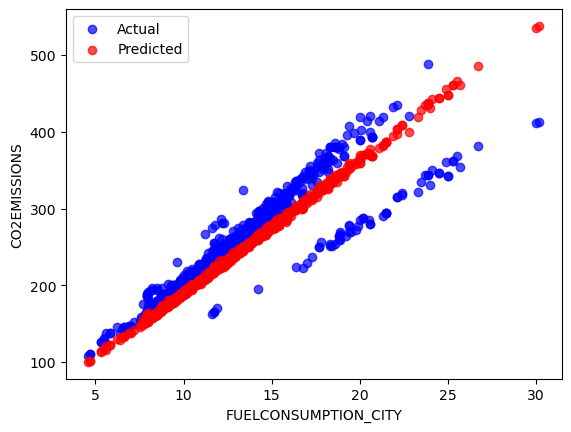

In [31]:
plt.scatter(X_test["FUELCONSUMPTION_CITY"], Y_test, label='Actual', color='blue', alpha=0.7)
plt.scatter(X_test["FUELCONSUMPTION_CITY"], y_pred1, label='Predicted', color='red', alpha=0.7)
plt.xlabel('FUELCONSUMPTION_CITY')
plt.ylabel('CO2EMISSIONS')
plt.legend()
plt.show()
